C:\Users\agflo\AppData\Local\Temp\ipykernel_11448\732181503.py:35: RuntimeWarning: invalid value encountered in arccos
  theta_f = np.arccos(1 - 2 * (x_f - x_i) / R)


Straight line time: 1.13 seconds
Vertical + Horizontal time: 2.02 seconds
Brachistochrone time: nan seconds


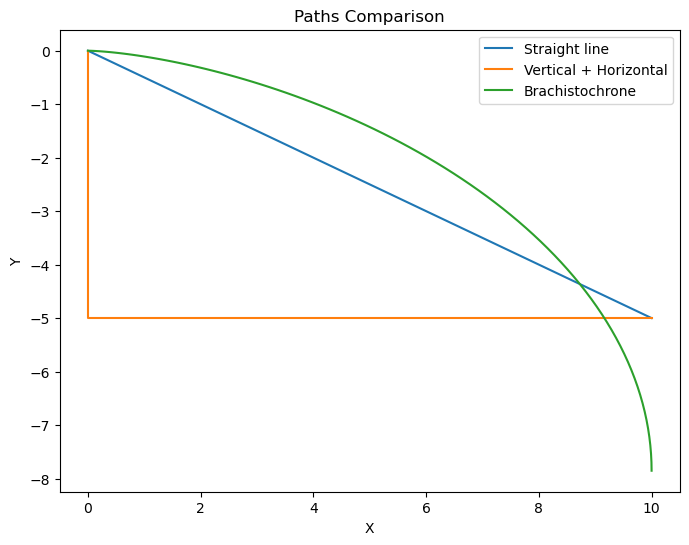

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration

# Points A and B
x_i, y_i = 0, 0
x_f, y_f = 10, -5  # Adjust for final point

# Time functions for different paths

# Straight-line path
def straight_line_time(x_i, y_i, x_f, y_f):
    # Time assuming constant velocity along a straight path
    distance = np.sqrt((x_f - x_i)**2 + (y_f - y_i)**2)
    # Velocity calculation
    velocity = np.sqrt(2 * g * (y_i - y_f))  # from energy conservation
    return distance / velocity

# Vertical drop and horizontal motion
def vertical_horizontal_time(x_i, y_i, x_f, y_f):
    # Time for vertical drop
    t_vertical = np.sqrt(2 * (y_i - y_f) / g)
    # Horizontal velocity after drop
    v_horizontal = np.sqrt(2 * g * (y_i - y_f))
    # Time for horizontal motion
    t_horizontal = (x_f - x_i) / v_horizontal
    return t_vertical + t_horizontal

# Brachistochrone curve (cycloid)
def brachistochrone_time(x_i, y_i, x_f, y_f):
    # Parametric equations for the cycloid
    R = abs(y_f - y_i)
    theta_f = np.arccos(1 - 2 * (x_f - x_i) / R)
    
    def x(theta):
        return R / 2 * (theta - np.sin(theta))
    
    def y(theta):
        return R / 2 * (1 - np.cos(theta))
    
    # Calculate total time
    T = theta_f / np.sqrt(g / R)
    return T

# Simulate the paths
t_straight = straight_line_time(x_i, y_i, x_f, y_f)
t_vertical_horizontal = vertical_horizontal_time(x_i, y_i, x_f, y_f)
t_brachistochrone = brachistochrone_time(x_i, y_i, x_f, y_f)

# Output the times
print(f"Straight line time: {t_straight:.2f} seconds")
print(f"Vertical + Horizontal time: {t_vertical_horizontal:.2f} seconds")
print(f"Brachistochrone time: {t_brachistochrone:.2f} seconds")

# Plot the paths
theta = np.linspace(0, np.pi, 100)
x_cycloid = x_f / 2 * (1 - np.cos(theta))
y_cycloid = y_f / 2 * (theta - np.sin(theta))

plt.figure(figsize=(8,6))
plt.plot([x_i, x_f], [y_i, y_f], label="Straight line")
plt.plot([x_i, x_i, x_f], [y_i, y_f, y_f], label="Vertical + Horizontal")
plt.plot(x_cycloid, y_cycloid, label="Brachistochrone")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Paths Comparison")
plt.show()


c:\Users\agflo\Anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


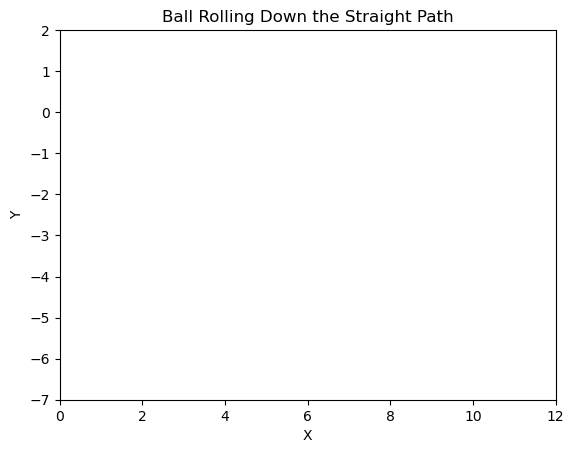

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
g = 9.81  # gravitational acceleration

# Points A and B
x_i, y_i = 0, 0
x_f, y_f = 10, -5  # Adjust for final point

# Straight-line motion
def straight_line_motion(t, T_total):
    x = x_i + (x_f - x_i) * (t / T_total)
    y = y_i + (y_f - y_i) * (t / T_total)
    return x, y

# Vertical drop + horizontal motion
def vertical_horizontal_motion(t, T_v, T_h):
    if t < T_v:
        # Vertical drop phase
        y = y_i - 0.5 * g * t**2
        x = x_i
    else:
        # Horizontal motion phase
        y = y_f
        t_h = t - T_v
        x = x_i + np.sqrt(2 * g * (y_i - y_f)) * t_h
    return x, y

# Brachistochrone curve motion
def brachistochrone_motion(t, R, theta_f):
    theta = theta_f * (t / (theta_f / np.sqrt(g / R)))
    x = R / 2 * (theta - np.sin(theta))
    y = R / 2 * (1 - np.cos(theta))
    return x, y

# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlim(0, x_f + 2)
ax.set_ylim(y_f - 2, y_i + 2)
ball, = ax.plot([], [], 'bo', ms=10)  # Ball marker

# Time settings for the simulation
frames = 200  # Number of frames for animation

# Calculate times for the three paths
T_straight = np.sqrt(2 * (y_i - y_f + np.sqrt((x_f - x_i)**2 + (y_f - y_i)**2)) / g)
T_vertical = np.sqrt(2 * (y_i - y_f) / g)
T_horizontal = (x_f - x_i) / np.sqrt(2 * g * (y_i - y_f))
T_total_vh = T_vertical + T_horizontal
R = abs(y_f - y_i)
theta_f = np.pi
T_brachistochrone = theta_f / np.sqrt(g / R)

# Path type
path_type = 'straight'  # Change to 'straight', 'vertical_horizontal', or 'brachistochrone'

# Animation function
# Animation function
def animate(i):
    t = i / frames * T_brachistochrone  # Scaled time for the animation

    if path_type == 'straight':
        x, y = straight_line_motion(t, T_straight)
    elif path_type == 'vertical_horizontal':
        x, y = vertical_horizontal_motion(t, T_vertical, T_horizontal)
    elif path_type == 'brachistochrone':
        x, y = brachistochrone_motion(t, R, theta_f)

    ball.set_data([x], [y])  # Pass x and y as lists
    return ball,

# Remove the 'blit=True' argument
ani = FuncAnimation(fig, animate, frames=frames, interval=50)
plt.title(f"Ball Rolling Down the {path_type.capitalize()} Path")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
import numpy as np
import plotly.graph_objects as go

# Constants
g = 9.81    # gravitational acceleration
h = 10      # initial drop height
l = 10      # x distance

# Points A and B
x_i, y_i = -l, h
x_f, y_f = 0, 0  # Adjust for final point

# Total frames for the animation
frames = 200

# Calculate times for the three paths
T_straight = np.sqrt(2 * (y_i - y_f + np.sqrt((x_f - x_i)**2 + (y_f - y_i)**2)) / g)
T_vertical = np.sqrt(2 * (y_i - y_f) / g)
T_horizontal = (x_f - x_i) / np.sqrt(2 * g * (y_i - y_f))
T_total_vh = T_vertical + T_horizontal
R = abs(y_f - y_i)
theta_f = np.pi
T_brachistochrone = theta_f / np.sqrt(g / R)

# Straight-line motion
def straight_line_motion(t, T_total):
    x = x_i + (x_f - x_i) * (t / T_total)
    y = y_i + (y_f - y_i) * (t / T_total)
    return x, y

# Vertical drop + horizontal motion
def vertical_horizontal_motion(t, T_v, T_h):
    if t < T_v:
        # Vertical drop phase
        y = y_i - 0.5 * g * t**2
        x = x_i
    else:
        # Horizontal motion phase
        t_h = t - T_v
        y = y_f
        x = x_i + np.sqrt(2 * g * (y_i - y_f)) * t_h
    return x, y

# Brachistochrone curve motion
def brachistochrone_motion(t, R, theta_f):
    theta = theta_f * (t / (theta_f / np.sqrt(g / R)))
    x = R / 2 * (theta - np.sin(theta))
    y = R / 2 * (1 - np.cos(theta))
    return x, y

# Generate the data for all frames
def generate_data(path_type):
    data = []
    time_steps = np.linspace(0, T_brachistochrone, frames)
    
    for t in time_steps:
        if path_type == 'straight':
            x, y = straight_line_motion(t, T_straight)
        elif path_type == 'vertical_horizontal':
            x, y = vertical_horizontal_motion(t, T_vertical, T_horizontal)
        elif path_type == 'brachistochrone':
            x, y = brachistochrone_motion(t, R, theta_f)
        data.append((x, y))
    return data

# Path type
path_type = 'straight'  # Change to 'straight', 'vertical_horizontal', or 'brachistochrone'

# Get data for the chosen path
motion_data = generate_data(path_type)

# Create the figure for Plotly
fig = go.Figure(
    data=[go.Scatter(x=[x_i], y=[y_i], mode="markers", marker=dict(size=10), name="Ball")],
    layout=go.Layout(
        xaxis=dict(range=[x_i - 1, x_f + 2], title="X"),
        yaxis=dict(range=[y_f - 2, y_i + 2], title="Y"),
        title=f"Ball Rolling Down the {path_type.capitalize()} Path",
        updatemenus=[dict(type="buttons", showactive=False,
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, dict(frame=dict(duration=50, redraw=True), 
                                                         fromcurrent=True, mode='immediate')])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[x], y=[y], mode="markers", marker=dict(size=10))])
            for x, y in motion_data]
)

# Show the plot
fig.show()


In [17]:
import numpy as np
import plotly.graph_objects as go

# Constants
g = 9.81    # gravitational acceleration
h = 10      # initial drop height
l = 10      # horizontal distance

# Points A and B
x_i, y_i = -l, h
x_f, y_f = 0, 0  # final point

# Calculate theta and acceleration along the incline
theta = np.arctan(h / l)
a = g * np.sin(theta)

# Calculate the total distance along the slope
r_total = np.sqrt(h**2 + l**2)

# Maximum time to reach the end of the slope
t_max = np.sqrt(2 * r_total / a)

# Time array
time_steps = np.linspace(0, t_max, 200)

# Calculate r(t) for each time step
r_t = 0.5 * a * time_steps**2

# Convert r(t) to (x(t), y(t)) using proportions along the straight line
x_t_1 = x_i + (r_t / r_total) * (x_f - x_i)
y_t_1 = y_i + (r_t / r_total) * (y_f - y_i)

# Create the figure for Plotly
fig = go.Figure(
    data=[go.Scatter(x=[x_i], y=[y_i], mode="markers", marker=dict(size=10), name="Ball")],
    layout=go.Layout(
        xaxis=dict(range=[x_i - 1, x_f + 1], title="X"),
        yaxis=dict(range=[y_f - 1, y_i + 1], title="Y"),
        title="Ball Rolling Down the Straight Line",
        updatemenus=[dict(type="buttons", showactive=False,
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, dict(frame=dict(duration=50, redraw=True), 
                                                         fromcurrent=True, mode='immediate')])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[x], y=[y], mode="markers", marker=dict(size=10))])
            for x, y in zip(x_t_1, y_t_1)]
)

# Show the plot
fig.show()


In [15]:
# Maximum velocity of ball upon reaching ground
v_drop = np.sqrt(2 * g * h)

# Maximum time to reach the end of the slope
t_max_drop = np.sqrt(2 * h / g)
t_max_roll = l / v_drop
t_max_total = t_max_drop + t_max_roll

# Time array
time_steps = np.linspace(0, t_max_total, 200)

# Initialize lists for x and y positions
x_t = []
y_t = []

# Loop through each time step and calculate positions
for t in time_steps:
    if t <= t_max_drop:
        # Vertical drop phase
        x_t.append(-l)  # x remains 0 during the drop
        y_t.append(-0.5 * g * t**2 + h)  # y follows free fall equation
    else:
        # Rolling phase
        x_t.append(v_drop * (t - t_max_drop) - l)  # x increases linearly after the drop
        y_t.append(0)  # y remains 0 during the rolling phase

# Create the figure for Plotly
fig = go.Figure(
    data=[go.Scatter(x=[x_i], y=[y_i], mode="markers", marker=dict(size=10), name="Ball")],
    layout=go.Layout(
        xaxis=dict(range=[x_i - 1, x_f + 1], title="X"),
        yaxis=dict(range=[y_f - 1, y_i + 1], title="Y"),
        title="Ball Rolling Down the Straight Line",
        updatemenus=[dict(type="buttons", showactive=False,
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, dict(frame=dict(duration=50, redraw=True), 
                                                         fromcurrent=True, mode='immediate')])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[x], y=[y], mode="markers", marker=dict(size=10))])
            for x, y in zip(x_t, y_t)]
)

# Show the plot
fig.show()

In [18]:
import numpy as np
import plotly.graph_objects as go

# Constants
g = 9.81    # gravitational acceleration
h = 10      # initial drop height
l = 10      # horizontal distance

# Points A and B for the straight-line motion
x_i, y_i = -l, h
x_f, y_f = 0, 0

# Calculate theta and acceleration along the incline
theta = np.arctan(h / l)
a = g * np.sin(theta)

# Calculate the total distance along the slope
r_total = np.sqrt(h**2 + l**2)

# Maximum time to reach the end of the slope for straight-line motion
t_max_straight = np.sqrt(2 * r_total / a)

# Maximum velocity and times for vertical drop + rolling motion
v_drop = np.sqrt(2 * g * h)
t_max_drop = np.sqrt(2 * h / g)
t_max_roll = l / v_drop
t_max_total = t_max_drop + t_max_roll

# Time array
time_steps_straight = np.linspace(0, t_max_straight, 200)
time_steps_drop_roll = np.linspace(0, t_max_total, 200)

# Calculate r(t) for the straight-line path
r_t = 0.5 * a * time_steps_straight**2

# Convert r(t) to (x(t), y(t)) using proportions along the straight line
x_t_1 = x_i + (r_t / r_total) * (x_f - x_i)
y_t_1 = y_i + (r_t / r_total) * (y_f - y_i)

# Initialize lists for the drop + roll path
x_t_2 = []
y_t_2 = []

# Calculate positions for drop + roll motion
for t in time_steps_drop_roll:
    if t <= t_max_drop:
        # Vertical drop phase
        x_t_2.append(-l)  # x remains constant during the drop
        y_t_2.append(-0.5 * g * t**2 + h)  # y follows free fall equation
    else:
        # Rolling phase
        x_t_2.append(v_drop * (t - t_max_drop) - l)  # x increases linearly after the drop
        y_t_2.append(0)  # y remains constant at 0 during the rolling phase

# Create the figure for Plotly with both paths
fig = go.Figure()

# Add the straight-line motion to the figure
fig.add_trace(go.Scatter(x=x_t_1, y=y_t_1, mode="lines+markers", name="Straight Line Path"))

# Add the drop + roll motion to the figure
fig.add_trace(go.Scatter(x=x_t_2, y=y_t_2, mode="lines+markers", name="Drop + Roll Path"))

# Customize the layout
fig.update_layout(
    xaxis=dict(range=[-l - 2, 2], title="X"),
    yaxis=dict(range=[-2, h + 2], title="Y"),
    title="Ball Motion: Straight Line vs Drop and Roll"
)

# Show the plot
fig.show()


In [19]:
import numpy as np
import plotly.graph_objects as go

# Constants
g = 9.81    # gravitational acceleration
h = 10      # initial drop height
l = 10      # horizontal distance

# Points A and B for the straight-line motion
x_i, y_i = -l, h
x_f, y_f = 0, 0

# Calculate theta and acceleration along the incline
theta = np.arctan(h / l)
a = g * np.sin(theta)

# Calculate the total distance along the slope
r_total = np.sqrt(h**2 + l**2)

# Maximum time to reach the end of the slope for straight-line motion
t_max_straight = np.sqrt(2 * r_total / a)

# Maximum velocity and times for vertical drop + rolling motion
v_drop = np.sqrt(2 * g * h)
t_max_drop = np.sqrt(2 * h / g)
t_max_roll = l / v_drop
t_max_total = t_max_drop + t_max_roll

# Time array (use maximum time from both animations)
time_steps = np.linspace(0, max(t_max_straight, t_max_total), 200)

# Calculate r(t) for the straight-line path
r_t_straight = 0.5 * a * time_steps**2
x_t_straight = x_i + (r_t_straight / r_total) * (x_f - x_i)
y_t_straight = y_i + (r_t_straight / r_total) * (y_f - y_i)

# Initialize lists for the drop + roll path
x_t_drop_roll = []
y_t_drop_roll = []

# Calculate positions for drop + roll motion
for t in time_steps:
    if t <= t_max_drop:
        # Vertical drop phase
        x_t_drop_roll.append(-l)  # x remains constant during the drop
        y_t_drop_roll.append(-0.5 * g * t**2 + h)  # y follows free fall equation
    else:
        # Rolling phase
        x_t_drop_roll.append(v_drop * (t - t_max_drop) - l)  # x increases linearly after the drop
        y_t_drop_roll.append(0)  # y remains constant at 0 during the rolling phase

# Create the figure for Plotly
fig = go.Figure()

# Add traces for the initial position of both animations
fig.add_trace(go.Scatter(x=[x_t_straight[0]], y=[y_t_straight[0]], mode="markers", marker=dict(size=10), name="Straight Line Path"))
fig.add_trace(go.Scatter(x=[x_t_drop_roll[0]], y=[y_t_drop_roll[0]], mode="markers", marker=dict(size=10), name="Drop + Roll Path"))

# Define animation frames for both paths
frames = []
for i in range(len(time_steps)):
    frames.append(go.Frame(data=[
        go.Scatter(x=[x_t_straight[i]], y=[y_t_straight[i]], mode="markers", marker=dict(size=10)),
        go.Scatter(x=[x_t_drop_roll[i]], y=[y_t_drop_roll[i]], mode="markers", marker=dict(size=10))
    ]))

# Update the layout to include buttons and animation settings
fig.update_layout(
    xaxis=dict(range=[-l - 2, 2], title="X"),
    yaxis=dict(range=[-2, h + 2], title="Y"),
    title="Ball Motion: Straight Line vs Drop and Roll",
    updatemenus=[dict(type="buttons", showactive=False,
                      buttons=[dict(label="Play",
                                    method="animate",
                                    args=[None, dict(frame=dict(duration=50, redraw=True), 
                                                     fromcurrent=True, mode='immediate')])])]
)

# Add animation frames to the figure
fig.frames = frames

# Show the plot with the animations
fig.show()
